Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl
from sklearn import linear_model
from joblib import dump, load

Constantes

In [2]:
MAIN_PATH = '/content/drive/MyDrive/'
STATS_PATH = MAIN_PATH + 'Data_Football/Liga_Portugal/Stats/'

Functions

In [3]:
functions_path = MAIN_PATH + 'Colab Notebooks/Bet_Functions.ipynb'

%run '{functions_path}'

Init plot

In [4]:
mtl.rcParams['axes.grid'] = 'True'
mtl.rcParams['axes.spines.top'] = 'False'
mtl.rcParams['axes.spines.right'] = 'False'
mtl.rcParams['xtick.labelsize'] = 20
mtl.rcParams['ytick.labelsize'] = 20

Abrir stats

In [5]:
df_stats= pd.read_csv(STATS_PATH + 'Liga_Portugal_Stats_2022_23.csv')
df_stats

,Unnamed: 0,team,shots,shots_ot,shots_vs,shots_ot_vs,points
0,0,FAMALICAO,420,120,482,160,46
1,1,PORTIMONENSE,394,119,547,199,38
2,2,AROUCA,363,126,440,147,50
3,3,BOAVISTA,367,116,382,142,39
4,4,PORTO,508,184,291,81,83
5,5,SPLISBON,540,198,268,96,71
6,6,SPBRAGA,552,223,366,116,77
7,7,CHAVES,445,143,554,165,42
8,8,CASAPIA,379,117,461,150,39
9,9,GUIMARAES,392,120,401,124,52


Correlation Points vs Shots

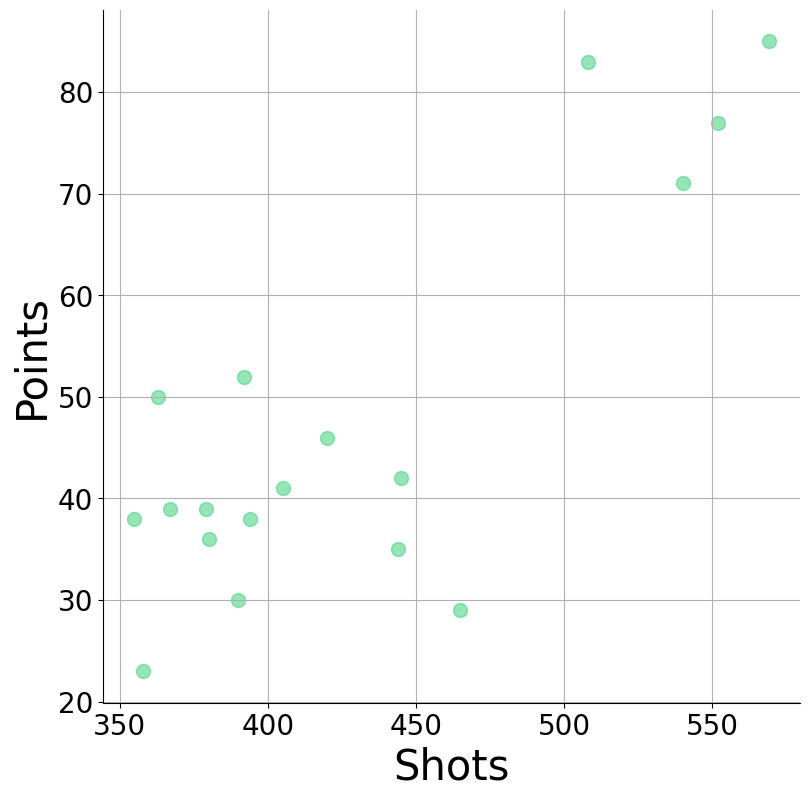

In [8]:
fig, ax = plt.subplots(figsize=(9,9))

plt.scatter(df_stats.shots, df_stats.points, s=100, alpha=0.5, c= "#2ECC71" )
ax.set_ylabel('Points', fontsize=30)
ax.set_xlabel('Shots', fontsize=30)

plt.show()

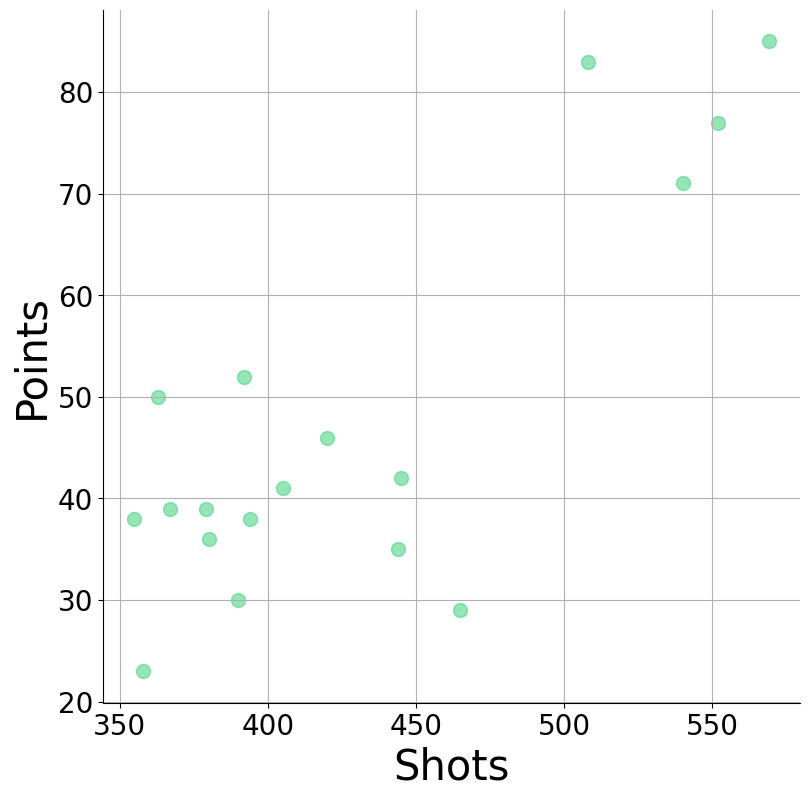

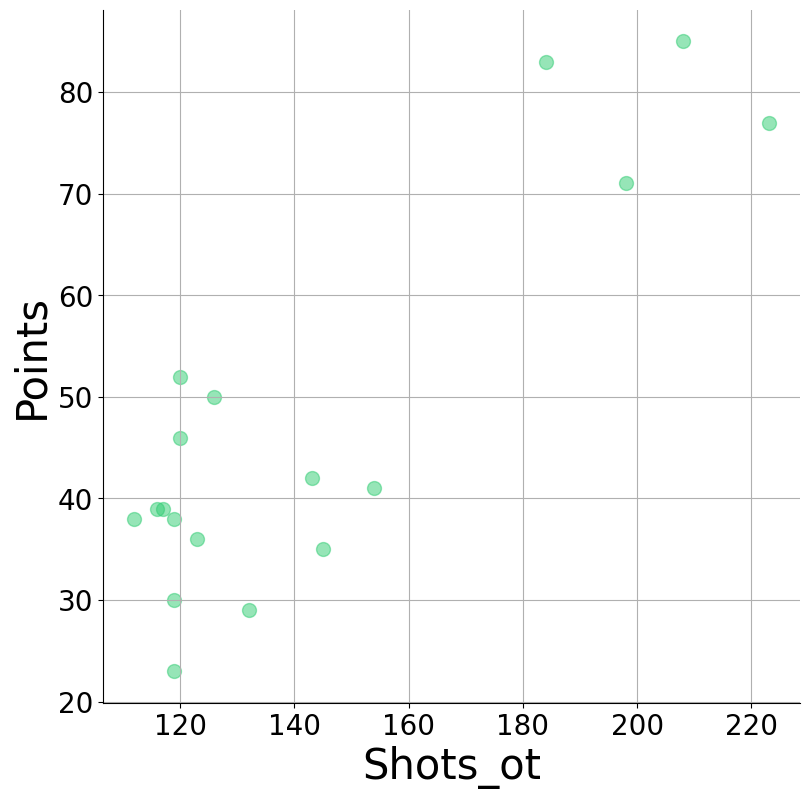

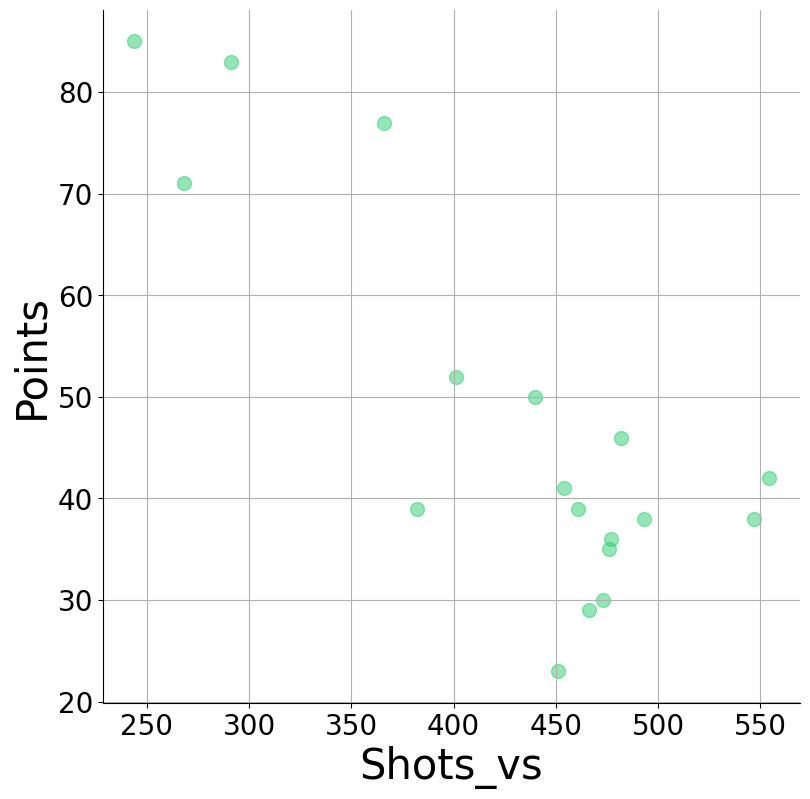

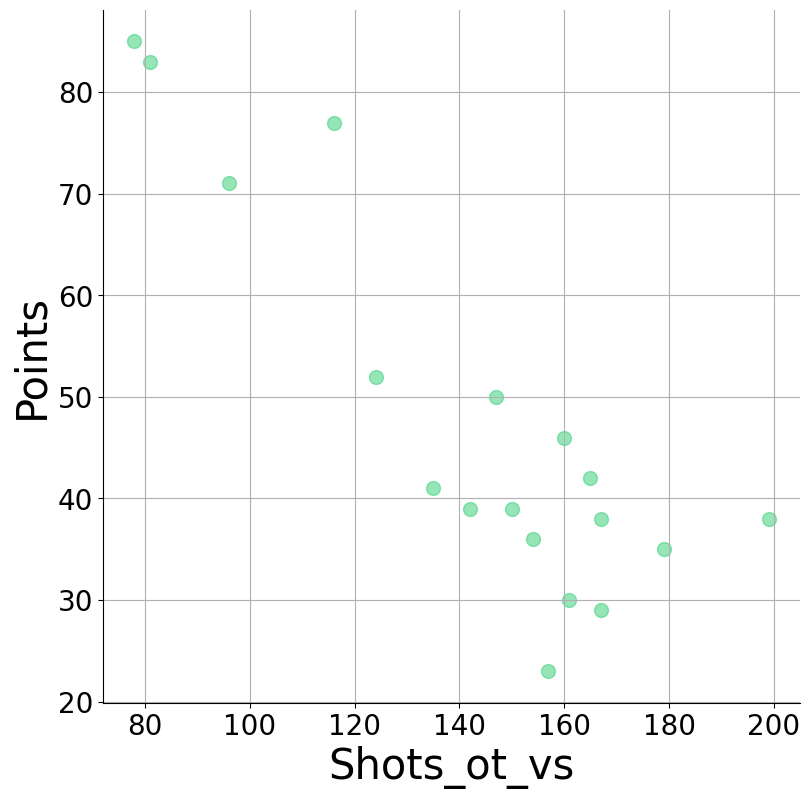

In [7]:
features = ['shots','shots_ot','shots_vs','shots_ot_vs']

for feat in features:
  fig, ax = plt.subplots(figsize=(9,9))

  plt.scatter(df_stats[feat], df_stats.points, s=100, alpha=0.5, c= "#2ECC71" )
  ax.set_ylabel('Points', fontsize=30)
  ax.set_xlabel(feat.capitalize(), fontsize=30)

  plt.show()

Model Training

In [ ]:
features = df_stats[['shots','shots_ot','shots_vs','shots_ot_vs']]

target = df_stats['points']

regr = linear_model.LinearRegression(fit_intercept=False)

model = regr.fit(features, target)

model.score(features, target)

0.8262043616309787

Escreve o modelo no disco

In [ ]:
dump (model, '/content/drive/MyDrive/Data_Football/Liga_Portugal/Model/lp_model.joblib')

['/content/drive/MyDrive/Data_Football/Liga_Portugal/Model/lp_model.joblib']